### Importations

In [1]:
import numpy as np              # pour les tableaux
import pandas as pd             # pour la visualisation des données
import matplotlib.pyplot as plt # pour les graphiques

from scipy.optimize import curve_fit # pour l'ajustement
from scipy.interpolate import pchip  # pour le lissage

# IV/ Réaliser
## Données expérimentales

In [2]:
# À vous de jouer
f = [4, 5, 6, 6.2, 6.4, 6.65, 6.750, 7, 7.5, 8, 10, 13, 15]
A = [0.103, 0.154, 0.466, 0.661, 0.937, 1.364, 1.828, 1.902, 0.758, 0.492, 0.254, 0.204, 0.196]
f, A = np.asarray(f), np.asarray(A)
visu = pd.DataFrame([f,A], index=['Fréquence', 'Amplitude a']).T
visu

,Fréquence,Amplitude a
0,4.00,0.103
1,5.00,0.154
2,6.00,0.466
3,6.20,0.661
4,6.40,0.937
5,6.65,1.364
6,6.75,1.828
7,7.00,1.902
8,7.50,0.758
9,8.00,0.492


# V/ Valider
## Traitement des données

### Calcul de $\omega$

In [3]:
w = 2*np.pi*f

### Amplitudes en vitesse et position

In [4]:
V = A/w
U = V/w

In [5]:
visu = pd.DataFrame([f, w, A, V, U],
                    index=['Fréquence',
                           'Pulsation',
                           'Amplitude a',
                           'Amplitude v',
                           'Amplitude u']
                   ).T
visu

,Fréquence,Pulsation,Amplitude a,Amplitude v,Amplitude u
0,4.00,25.132741,0.103,0.004098,0.000163
1,5.00,31.415927,0.154,0.004902,0.000156
2,6.00,37.699112,0.466,0.012361,0.000328
3,6.20,38.955749,0.661,0.016968,0.000436
4,6.40,40.212386,0.937,0.023301,0.000579
5,6.65,41.783182,1.364,0.032645,0.000781
6,6.75,42.411501,1.828,0.043102,0.001016
7,7.00,43.982297,1.902,0.043245,0.000983
8,7.50,47.123890,0.758,0.016085,0.000341
9,8.00,50.265482,0.492,0.009788,0.000195


### Tracé des valeurs expérimentales

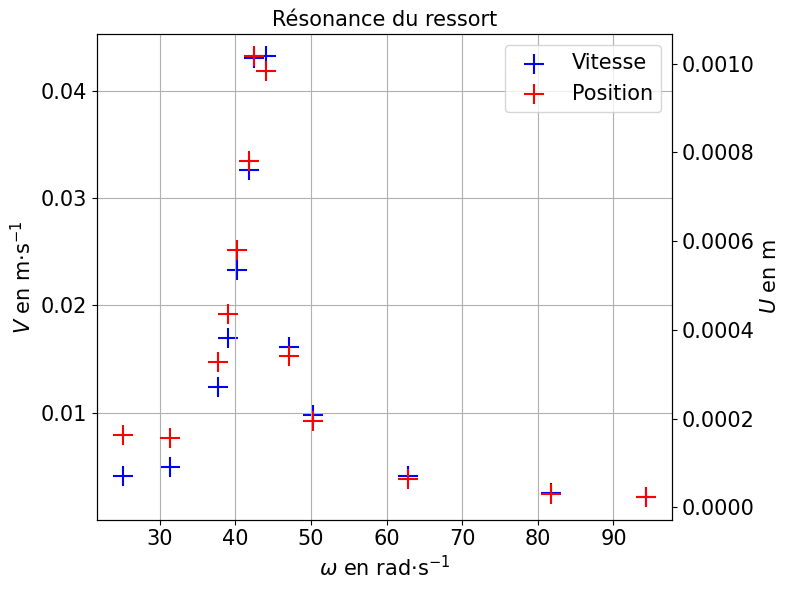

In [29]:
plt.close()                                 # force la fermeture des figures précédentes

# =========================================================================== #
#                                  Paramètres                                 #
# =========================================================================== #

fig = plt.figure(figsize=(8, 6))            # dimension horizontale, verticale
plt.grid()                                  # affiche un quadrillage de lecture

# =========================================================================== #
#                                    Vitesse                                  #
# =========================================================================== #

plt.scatter(w, V,                           # trace les valeurs de X en abscisse et Y en ordonnée
            marker='+', s=200,
            color='blue',       
            label='Vitesse')                 # pour la légende

plt.tick_params(labelsize=15)

plt.xlabel(r'$\omega$ en rad$\cdot$s$^{-1}$',
           fontsize=15)
plt.ylabel('$V$ en m$\cdot$s$^{-1}$',
           fontsize=15)

# =========================================================================== #
#                                   Position                                  #
# =========================================================================== #

plr = plt.twinx()                           # permet de tracer avec un axe secondaire

plr.tick_params(labelsize=15)
plr.scatter(w, U,
            marker='+', s=200,
            color='red',       
            label='Position')

plr.set_ylabel('$U$ en m',
               fontsize=15)

# =========================================================================== #
#                               Titre, légende                                #
# =========================================================================== #

plt.title('Résonance du ressort',
          fontsize=15)
fig.legend(fontsize=15, 
           loc='upper right',               # quel coin constitue l'ancrage de la boîte
           bbox_to_anchor=(1,1),            # où placer ce point
           bbox_transform=plr.transAxes)    # à l'intérieur de la figure

plt.tight_layout()                          # évite les débordements ou rognages
plt.show()

### Lissage

!!! abstract `pchip`
`pchip` peut s'apparenter à `np.polyfit` pour la régression linéaire : c'est une fonction qui prend une liste de valeurs en X et une de valeurs en Y et qui joint chaque point par une courbe ; ici ce ne sont pas des segments.
!!!

In [7]:
Vlisse = pchip(w, V)     # Comme un régression linéaire mais cubique
Ulisse = pchip(w, U)

!!! abstract Tracé d'une fonction : abscisse
Une fonction en $\texttt{Python}$ reste une application qui donne une image à un antécédant. Pour pouvoir en faire la représentation graphique, il faut définir toute une série de points sur lesquels on veut tracer pour ensuite les relier un à un. Pour cela, `np.linspace` permet de découper un intervalle de la valeur minimale voulue à la valeur maximale voulue, avec un nombre de points $N$.

Ici, on veut tracer de la valeur minimale de $\omega$ à la valeur maximale de $\omega$, en ayant suffisamment de points pour que le tracé soit efficace. Complétez le code suivant pour définir `wliste` la liste des valeurs de $\omega$ sur laquelle tracer.
!!!

In [8]:
wliste = np.linspace(min(w), max(w), 1000)

!!! abstract Tracé d'une fonction : ordonnée
On a dont toutes les briques pour tracer la fonction : la fonction en elle-même, les valeurs d'abscisse, et les meilleurs paramètres. Pour avoir les ordonnées, il suffit de calculer `f(x)`.
!!!

In [9]:
Vliste = Vlisse(wliste)
Uliste = Ulisse(wliste)

### Tracé avec lissage

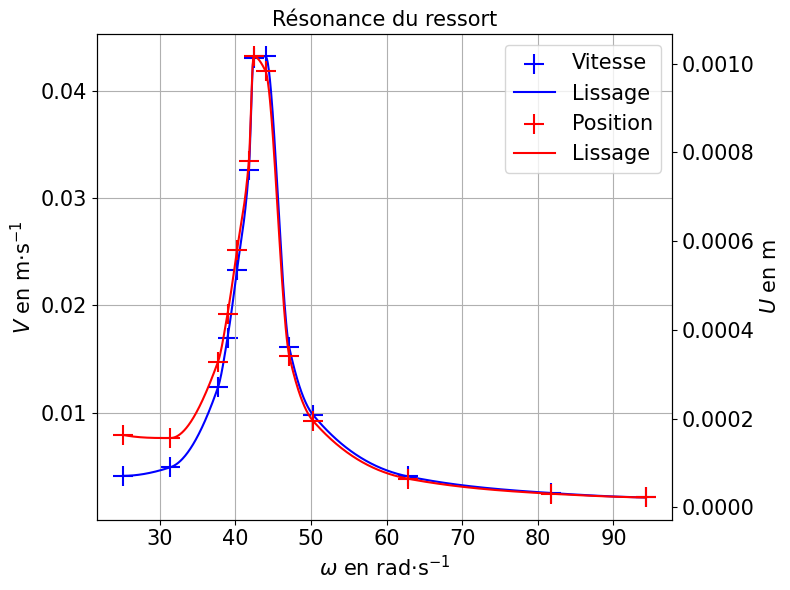

In [30]:
plt.close()                                 # force la fermeture des figures précédentes

# =========================================================================== #
#                                  Paramètres                                 #
# =========================================================================== #

fig = plt.figure(figsize=(8, 6))            # dimension horizontale, verticale
plt.grid()                                  # affiche un quadrillage de lecture

# =========================================================================== #
#                                    Vitesse                                  #
# =========================================================================== #

plt.scatter(w, V,                           # trace les valeurs de X en abscisse et Y en ordonnée
            marker='+', s=200,
            color='blue',
            label='Vitesse')                 # pour la légende

plt.tick_params(labelsize=15)

plt.plot(wliste, Vliste,
         color='blue',
         label='Lissage')

plt.xlabel(r'$\omega$ en rad$\cdot$s$^{-1}$',
           fontsize=15)
plt.ylabel('$V$ en m$\cdot$s$^{-1}$',
           fontsize=15)

# =========================================================================== #
#                                   Position                                  #
# =========================================================================== #

plr = plt.twinx()                           # permet de tracer avec un axe secondaire

plr.tick_params(labelsize=15)

plr.scatter(w, U,
            marker='+', s=200,
            color='red',       
            label='Position')

plt.plot(wliste, Uliste,
         color='red',
         label='Lissage')

plr.set_ylabel('$U$ en m',
               fontsize=15)

# =========================================================================== #
#                               Titre, légende                                #
# =========================================================================== #

plt.title('Résonance du ressort',
          fontsize=15)
fig.legend(fontsize=15, 
           loc='upper right',               # quel coin constitue l'ancrage de la boîte
           bbox_to_anchor=(1,1),            # où placer ce point
           bbox_transform=plr.transAxes)    # à l'intérieur de la figure

plt.tight_layout()                          # évite les débordements ou rognages
plt.show()

### Estimation des paramètres du modèle.
Ce lissage permet une détermination rapide et simple des paramètres du modèle. Indiquez leurs valeurs ci-après.

In [11]:
w0_esti = 45
Q_esti = 45/5

## Ajustement des données

!!! abstract Utilité de $\texttt{Python}$
Avec les outils de traitement informatiques usuels, comme $\texttt{LatisPro}$ ou $\texttt{Regressi}$, on relève les données et on réalise un lissage pour combler le vide. C'est une approche valable pour les expériences dont on ne connaît pas l'étude théorique, mais n'est pas appropriée pour correctement tester un modèle analytique. Dans la recherche scientifique, on établit la théorie analytique puis on expérimente pour trouver les valeurs et comparer.

Dans notre cas, les fonctions analytiques de l'amplitude de la vitesse et de l'élongation sont connues, et fournies dans l'énoncé du TP. Pour estimer les caractéristiques du dispositif pour lequel vous venez de relever les données expérimentales, nous allons définir les fonctions associées avec les constantes $\omega_0$, $K$ et $Q$ comme des paramètres libres : c'est $\texttt{Python}$ qui va se charger de les déterminer à partir du relevé, plutôt que d'en faire une lecture graphique. Nous allons ensuite comparer les deux méthodes de lissage et d'ajustement.


Pour rentrer un complexe en `Python`, il faut utiliser `1j`, par exemple `1j*Q`.
!!!

### Définition des fonctions

!!! info Racine carrée
On utilise `np.sqrt` pour la racine carrée.
!!!

In [41]:
def V_cplx(w, Kv, w0, Q):
    return(Kv/(1+1j*Q*(w/w0-w0/w))) # rentrer la fonction demandée
def V_func(w, Kv, w0, Q):
    return(abs(V_cplx(w, Kv, w0, Q)))  # donne le module directement

def U_cplx(w, Ku, w0, Q):
    return(Ku/(1-(w/w0)**2 + 1j/Q*w/w0)) # rentrer la fonction demandée
def U_func(w, Ku, w0, Q):
    return(abs(U_cplx(w, Ku, w0, Q))) # idem

### Ajustement par `curve_fit`

!!! abstract Fonctionnement d'un ajustement
Pour ajuster (*fit* en anglais, *fitter* en franglais) un modèle à des données expérimentales, il faut donner à l'ajusteur des valeurs de départ. Sinon, on pourrait trouver des valeurs aberrantes pour des paramètres physiques dont on sait, par exemple, qu'ils sont positifs.

On a déjà estimé grossièrement les valeurs de $\omega_0$ et $Q$ à partir du tracé de vos valeurs expérimentales. On les renomme ici en tant que valeurs initiales pour séparer leur fonction. On prendra $K = 1$ pour chaque numérateur. Ces valeurs initales sont passées à des listes `p0_V` et `p0_U` pour être fournies à `curve_fit` ensuite.
!!!

#### Estimation des valeurs initiales

In [37]:
Kv_init, Ku_init = [1,1]
w0_init = w0_esti
Q_init = Q_esti

p0_V = [Kv_init, w0_init, Q_init]
p0_U = [Ku_init, w0_init, Q_init]  # listes différentes si Ku et Kv doivent être différents

#### Calcul

!!! abstract Utilisation de `curve_fit`
On donne alors à `curve_fit` la fonction à ajuster, puis les valeurs en $x$ et les valeurs en $y$, et enfin les conditions initiales. `curve_fit` renvoie en premier argument les valeurs des paramètres ajustés, ici dans l'ordre : $K$, $\omega_0$, $Q$. Ce sont donc ces valeurs qu'il faudra utiliser pour tracer la courbe ajustée.
!!!

In [42]:
val_vfit = curve_fit(V_func, w, V, p0=p0_V)[0]
val_ufit = curve_fit(U_func, w, U, p0=p0_U)[0]

Kv_fit, w0_vfit, Q_vfit = val_vfit
Ku_fit, w0_ufit, Q_ufit = val_ufit

print(f'Valeurs ajustées sur la vitesse : Kv = {Kv_fit:.2e}, w0 = {w0_vfit:.2f}, Q = {Q_vfit:.2f}')
print(f'Valeurs ajustées sur la position : Ku = {Ku_fit:.2e}, w0 = {w0_ufit:.2f}, Q = {Q_ufit:.2f}')

Valeurs ajustées sur la vitesse : Kv = 4.81e-02, w0 = 43.19, Q = 14.32
Valeurs ajustées sur la position : Ku = 7.96e-05, w0 = 43.20, Q = 13.88


#### Résultat

In [43]:
Vfit = V_func(wliste, *val_vfit)
Ufit = U_func(wliste, *val_ufit)

#### Tracé 

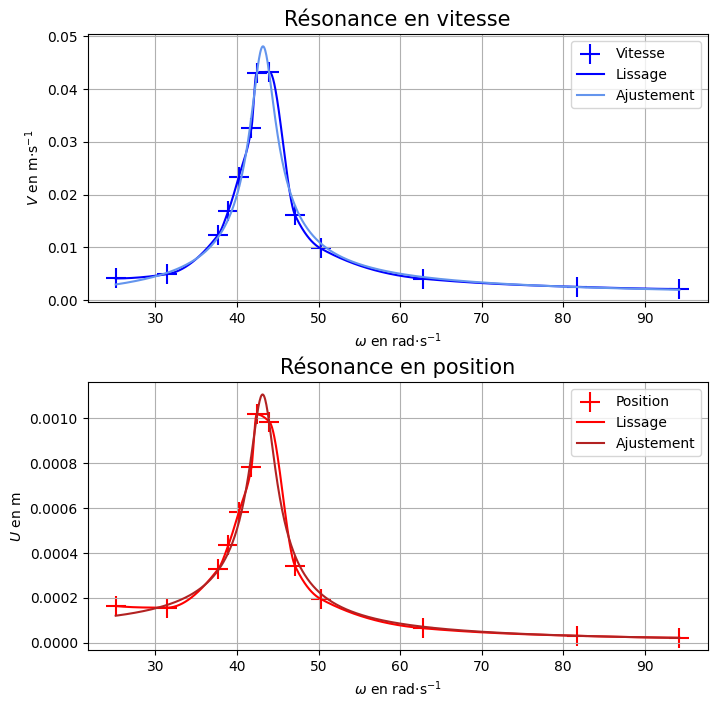

In [44]:
plt.close()                                 # force la fermeture des figures précédentes

# =========================================================================== #
#                                  Paramètres                                 #
# =========================================================================== #

fig, (ax1, ax2) = plt.subplots(2, 1,           # différencie les graphiques
                               sharex=True,
                               figsize=(8, 8)) # dimension horizontale, verticale
fig.subplots_adjust(hspace=0.3)
ax1.grid()                                     # affiche un quadrillage de lecture
ax2.grid()
ax1.xaxis.set_tick_params(labelbottom=True)

# =========================================================================== #
#                                    Vitesse                                  #
# =========================================================================== #

ax1.scatter(w, V,                           # trace les valeurs de X en abscisse et Y en ordonnée
            marker='+', s=200,
            color='blue',       
            label='Vitesse')                 # pour la légende

ax1.plot(wliste, Vliste,
         color='blue',
         label='Lissage')

ax1.plot(wliste, Vfit,
         color='cornflowerblue',
         label='Ajustement')

ax1.set_xlabel(r'$\omega$ en rad$\cdot$s$^{-1}$',
               fontsize=10)
ax1.set_ylabel('$V$ en m$\cdot$s$^{-1}$',
               fontsize=10)

# =========================================================================== #
#                                   Position                                  #
# =========================================================================== #

ax2.scatter(w, U,
            marker='+', s=200,
            color='red',       
            label='Position')

ax2.plot(wliste, Uliste,
         color='red',
         label='Lissage')

ax2.plot(wliste, Ufit,
         color='firebrick',
         label='Ajustement')

ax2.set_xlabel(r'$\omega$ en rad$\cdot$s$^{-1}$',
               fontsize=10)
ax2.set_ylabel('$U$ en m',
               fontsize=10)

# =========================================================================== #
#                               Titre, légende                                #
# =========================================================================== #

ax1.set_title('Résonance en vitesse',
              fontsize=15)
ax1.legend(fontsize=10, 
           loc='best')

ax2.set_title('Résonance en position',
              fontsize=15)
ax2.legend(fontsize=10, 
           loc='best')

# plt.tight_layout()                          # évite les débordements ou rognages

!!! note Note
Toutes les options de `grid`, `xticks` etc sont optionnelles, et ne sont pas à retenir. Ce qu'il est exigible que vous reteniez est simplement :
```
plt.scatter(X, Y)
plt.scatter(X, Z)
plt.show()
```
afin de tracer `Y` et `Z` sur le même graphe, avec un axe unique, et
```
plt.plot(xliste, yliste)
plt.show()
```
pour ajouter les courbes lisses. Je vous invite à essayer de lancer ces commandes et voir la différence… c'est ce qui pourra vous dinstinguer d'um élève lambda à quelqu'um d'investix et avec le sens de la présentation scientifique. À bon entendeur !
!!!